In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np

# Load the data from json format (cleaned up from XML)
with open('data.json', 'r') as f:
    data = json.load(f)
    
# Number of data points
data_points_count = len(data)
    
# Unique colors
unique_colors = set(circle['color'] for circle in data)

# Unique x
unique_x = sorted(set(circle['x'] for circle in data))

# Unique y
unique_y = sorted(set(circle['y'] for circle in data))

color_counts = Counter(circle['color'] for circle in data)
# color_counts = sorted(color_counts.items(), key=lambda t: t[1], reverse=True)

In [2]:
# Normalize the data
for circle in data:
    circle.update((k, int((v-3)/11)) for k, v in circle.items() if k == 'x')
    circle.update((k, int((v-3)/8)) for k, v in circle.items() if k == 'y')

In [3]:
#possible labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [4]:
# The original image unedited
Image(url= "original.svg")

In [5]:
# Images with bookend data removed
Image(url= "no_bookends.svg")

In [6]:
print('Data points: {}'.format(data_points_count))
print('Colors:      ' + '    '.join([color for color in unique_colors]))
print('Columns:     ' + str(len(unique_x)))
print('Rows:        ' + str(len(unique_y)))
print('\nColor Counts:')
for color in color_counts:
    count = color_counts[color]
    print("{} ({})".format(color, count))

Data points: 567
Colors:      #98CFAC    #99CEFF    #E365A6    #F9FAFB    #49B882    #D0B8FB    #FCC89B    #FAD9E7
Columns:     94
Rows:        19

Color Counts:
#98CFAC (11)
#49B882 (503)
#FAD9E7 (6)
#E365A6 (13)
#D0B8FB (1)
#99CEFF (6)
#FCC89B (1)
#F9FAFB (26)


In [7]:
dots_per_column = Counter(circle['x'] for circle in data)

In [8]:
dots_per_row = Counter(circle['y'] for circle in data)

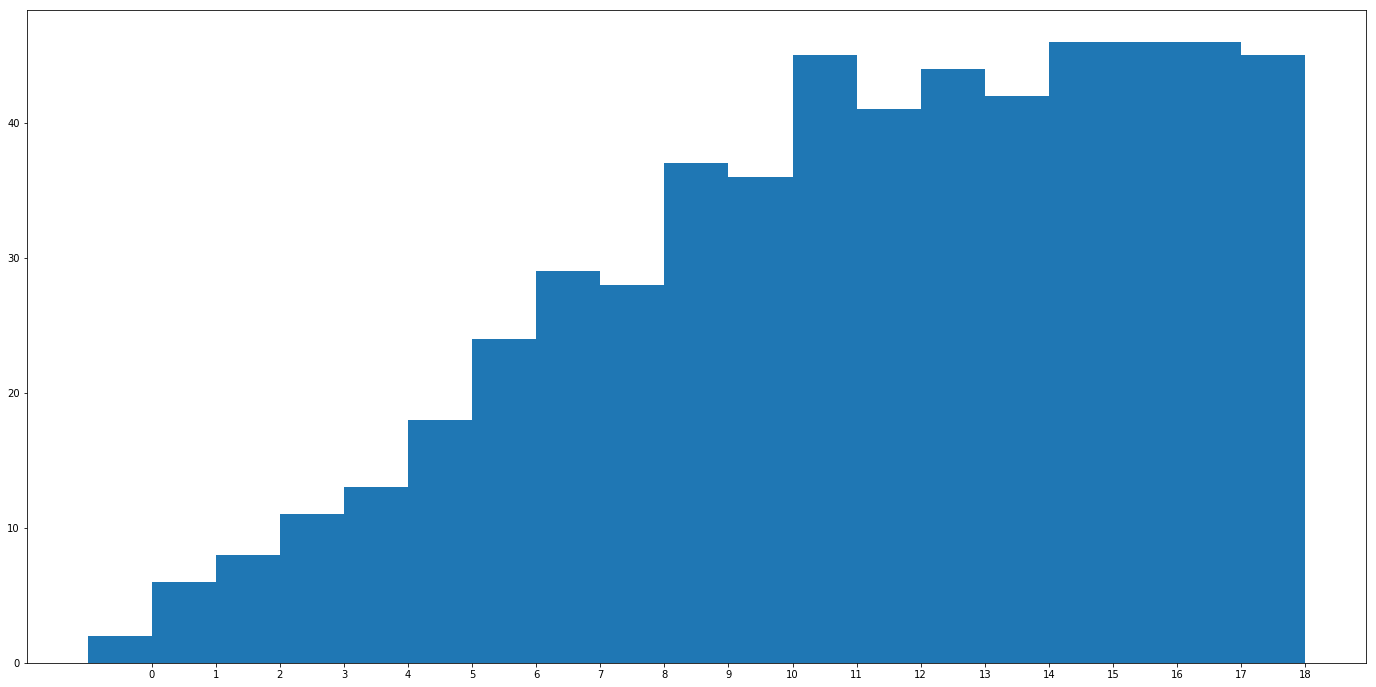

In [9]:
labels, values = zip(*dots_per_row.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24, 12))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

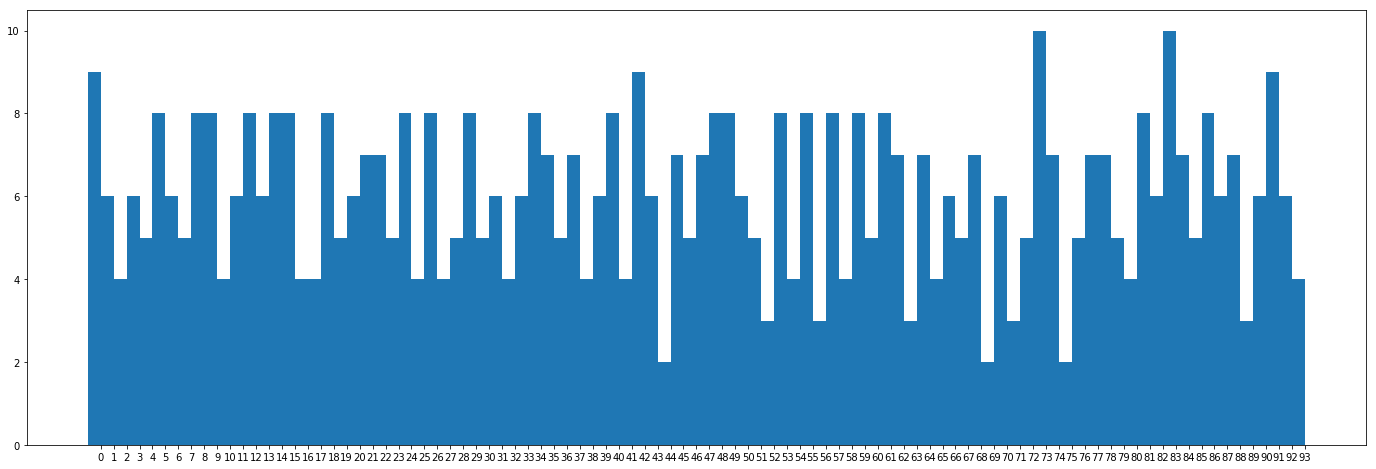

In [10]:
labels, values = zip(*dots_per_column.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24,8))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()